<a href="https://colab.research.google.com/github/DavidFM43/Compilers/blob/main/parteC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Subword tokenization


Recordemos que la tokenización consiste en el proceso de agrupar un conjunto de caracteres en trozos que tengan significado (como palabras).

En contraste, la tokenización por subpalabras es una variante de la usual. Esta herramienta resuelve problemas que deja la tokenización usual. Nos ayuda a separar trozos desconocidos en unidades mas pequeñas. Por ejemplo, la palabra 


```
unfriendly
```

En sistemas de tokenización para lenguaje natural sería un token. Sin embargo, usando tokenización por subpalabras, obtendríamos los siguientes tokens:


```
un
```
```
friend
```
```
ly
```

Lo cual, desde un punto de vista gramatical, representan oposición, sustantivos, y nominalización, respectivamente. Estas unidades de subpalabra se van a encontrar en otras palabras, por ejemplo

```
unambiguos
```
```
friendship
```
```
lovely
```
Lo cual representa una ventaja respecto a la tokenización usual si de procesamiento de lenguaje natural estamos hablando

Dentro de este camino existen diversos tipos de agrupamiento. El más simple de ellos consiste en tokenizar cada caracter sin realizar un agrupamiento más específico.

Entre otras aplicaciones, una de las más famosas fue la implementación de este sistema por parte de **OpenAI** para crear su modelo basado en mLSTM (multiplicative Long Short-Term Memory) el cual alcanzo el estado de "Estado del arte" en clasificación de sentimientos.


#Byte-Pair-Encoding


Es un algoritmo de tokenización por subpalabras en donde se comprime datos de manera que los pares de bytes consecutivos más comunes son reemplazados por bytes que no aparecen en aquellos datos. Su primera aparición ocurrió en el año 1994 con el artículo titulado “A New Algorithm for Data Compression”.

A grandes rasgos, se dice que `BPE` se asegura por representar en el vocabulario a las palabras más comunes, esta representación se da con tokens específicos.
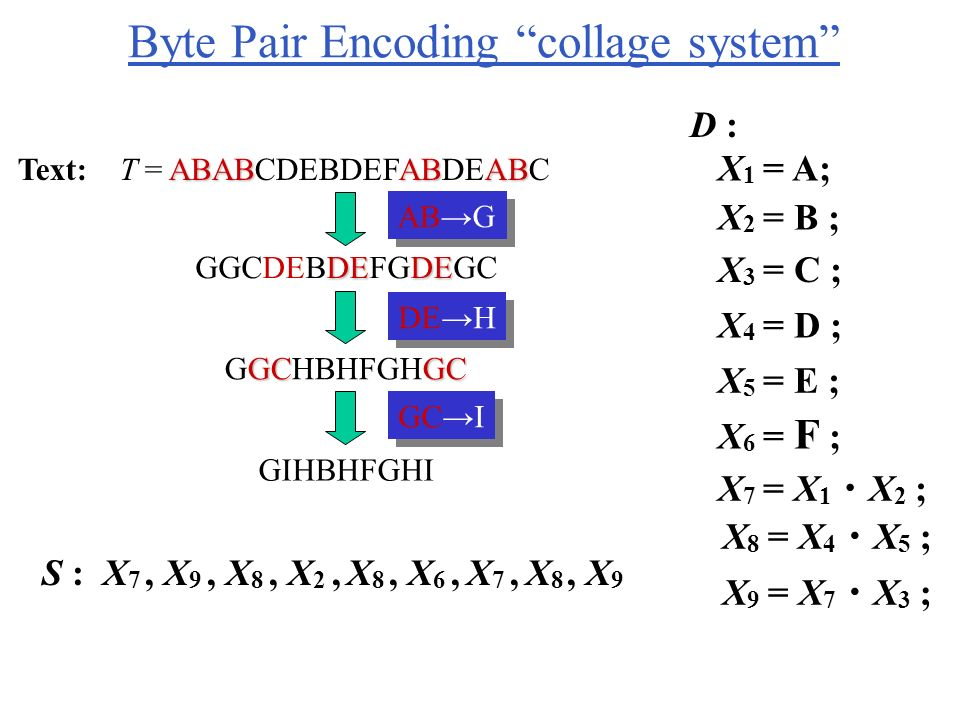

## Ejemplo


Supongamos que tenemos la siguiente cadena asociada a un lenguaje regular:


```
# aaabdaaabac
```
El algoritmo identifica que el par de bytes 


```
aa
```

Aparece con mayor frecuencia. Después de ello reemplaza esta por un un byte que no esté presente en la cadena, por ejemplo `Z`
De manera que la nueva cadena será codificada como
```
ZabdZabac
```
De forma parecida ocurre con el par

```
ab
```
la cual puede ser reemplazada por una `Y`, obteniendo:
```
ZYdZYac
```

Un aspecto de bastante relevancia en este algoritmo es su característica **recursiva**. Por ejemplo, se observa que la subcadena `ZY` aparece en nuestra cadena previa, por lo que se podría reemplazar `X=ZY`, con lo cual, se puede obtener algo de este estilo
```
XdXac
``` 
Con lo cual esta última cadena es la compresión de la cadena inicial aaabdaaabac.

#Unigram Algorithm

Consiste en un algoritmo de segmentación en subpalabras basado en el modelo de lenguaje de unigrama.

Recordemos que un unigrama consiste en una tokenización en sub palabras en donde la probabilidad de ocurrencia de una palabra depende excusivamente de las observaciones de ocurrencia de esa misma palabra y no se le asocia ninguna probabilidad condicional que dependa de otras palabras anteriormente leídas por el algoritmo
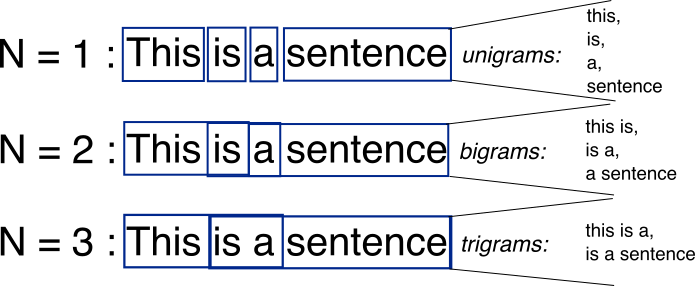

Provee de multiples segmentaciones con probabilidades. El modelo permite la estimulación de generación de ruido durante la segmentación de los datos ingresados.

Se supone que cada subpalabra ocurre independientemente. Por lo que la probabilidad de ocurrencia de una palabra 

$$\mathbf{s} = \mathbf{s}_1\mathbf{s}_2\cdots \mathbf{s}_M$$

Está dada por

$$
  \mathbb{P}[\mathbf{s}]:= \prod_{k=1}^M\mathbb{P}[\mathbf{s}_k]
$$
Para todo simbolo $a\in\Sigma$ (Alfabeto). Entonces la segmentación seleccionada es la que presenta mauor probabilidad. Es decir, si $S(\mathbf{X})$ denota al conjunto de posibles segmentaciones de una sentencia inicial $\mathbf{X}$, entonces, la segmentación está dada por

$$
  \mathbf{x}^*:=argmax_{\mathbf{x}\in S(\mathbf{X})}\mathbb{P}[\mathbf{x}]
$$

#Diferencias con parsers de NLP



El parsing en procesamiento de lenguaje natural consiste en la identificación de estructuras sintacticas de un texto analizando sus palabras y teniendo en cuenta la gramática del lenguaje asociado. El objetivo de este parsing es producir un árbol de sintaxis abstracto en donde cada nivel representa divisiones y clasificaciones gramaticales con base en los tokens identificados cada vez más específicos.

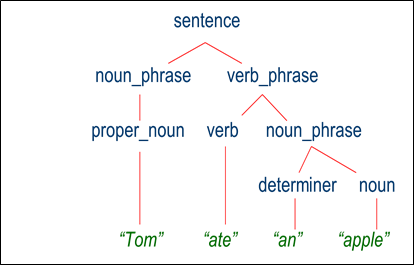

La diferencia principal entre estos parsers tradicionales con respecto a los tokenizadores por sub-palabras es su objetivo. 

Por un lado, los parsers de procesamiento de lenguaje natural pretenden tokenizar una sentencia en trozos que puedan estar asociados a una clase gramátical y que para un usuario humano cada token tenga sentido dentro del lenguaje natural.

Por otro lado, los algoritmos de tokenización por subpalabras buscan poder comprimir una sentencia dentro de un lenguaje (No necesariamente natural) de manera que se pueda codificar con mucha más eficiencia.

Mientras un parser de NLP tokeniza una sentencia como
``` 
I'll be refactoring a undesirable product
```
así:

```
I'll 
be 
refactoring 
a 
undesirable 
product
```
Por otro lado un algoritmo como BPE o Unigram realizaría la tokenización así
```
I
##'ll 
be 
##re
##fact
##or
##ing 
##a 
##un
##desir
##able 
##pro
##duct
```

#Bibliografía


Subword Tokenization - Handling Misspellings and Multilingual Data. 2022. [online] Available at: <https://www.thoughtvector.io/blog/subword-tokenization> [Accessed 25 September 2022].

Medium. 2022. A comprehensive guide to subword tokenisers. [online] Available at: <https://towardsdatascience.com/a-comprehensive-guide-to-subword-tokenisers-4bbd3bad9a7c> [Accessed 25 September 2022].

Medium. 2022. Byte-Pair Encoding: Subword-based tokenization algorithm. [online] Available at: <https://towardsdatascience.com/byte-pair-encoding-subword-based-tokenization-algorithm-77828a70bee0> [Accessed 26 September 2022].


Medium. 2022. N-gram language model. [online] Available at: <https://medium.com/mti-technology/n-gram-language-model-b7c2fc322799> [Accessed 26 September 2022].

Seth, N., 2022. Syntactical Parsing in NLP - Analytics Vidhya. [online] Analytics Vidhya. Available at: <https://www.analyticsvidhya.com/blog/2022/03/syntactical-parsing-in-nlp/> [Accessed 27 September 2022].